In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import torch
import joblib

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [2]:
#https://mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas

def rm(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
results = pd.DataFrame(columns=["Model", "AUROC", "Balanced Accuracy", "F1", "Recall", "Precision"])

def evaluation(y_test_input, y_pred_input, model_name):

    auroc = roc_auc_score(y_test_input, y_pred_input)
    bal_acc = balanced_accuracy_score(y_test_input, y_pred_input)
    f1 = f1_score(y_test_input, y_pred_input)
    recall = recall_score(y_test_input, y_pred_input)
    precis = precision_score(y_test_input, y_pred_input)

    results.loc[len(results)+1] = [type(model_name).__name__, auroc, bal_acc, f1, recall, precis]

    print("AUROC Score: ", auroc)
    print("Balanced Accuracy Score: ", bal_acc)
    print("F1 Score: ", f1)
    print("Recall Score: ", recall)
    print("Precision Score: ", precis)
    cm = confusion_matrix(y_test_input, y_pred_input)

    fig, ax = plt.subplots(figsize=(4, 6))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [4]:
X_test = pd.read_csv(path_csv + "ontime_reporting_X_test.csv")
y_test = pd.read_csv(path_csv + "ontime_reporting_y_test.csv")

In [5]:
X_test = rm(X_test)
y_test = np.ravel(y_test)

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned imbalanced model

In [6]:
logreg_tuned_imbalanced = joblib.load(path_model + "logreg_tuned_imbalance.joblib")
y_pred_logreg_tuned_imbalanced = logreg_tuned_imbalanced.predict(X_test)

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AUROC Score:  0.6634141116382084
Balanced Accuracy Score:  0.6634141116382084
F1 Score:  0.4732959240597713
Recall Score:  0.37747080712239595
Precision Score:  0.6343267470033664


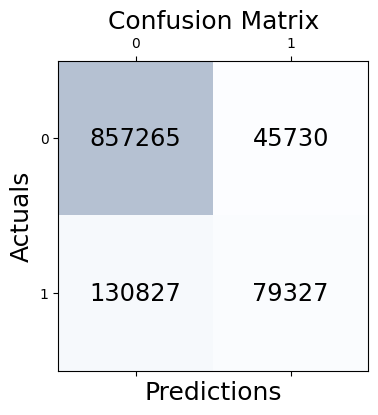

In [7]:
evaluation(y_test, y_pred_logreg_tuned_imbalanced, logreg_tuned_imbalanced)

## Evaluate XGBoost tuned imbalanced model

In [9]:
#import xgboost as xgb
#xgb.__version__
xgb_tuned_imbalance = joblib.load(path_model + "XGBoost_tuned_imbalance.joblib") #pip install xgboost==2.0.0 --user
y_pred_xgb_tuned_imbalance = xgb_tuned_imbalance.predict(X_test)

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [19:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:385: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [19:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


AUROC Score:  0.6887097419653977
Balanced Accuracy Score:  0.6887097419653978
F1 Score:  0.5258147968979578
Recall Score:  0.4163565766057272
Precision Score:  0.7133516496954972


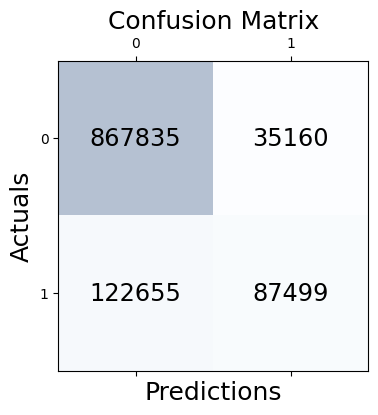

In [10]:
evaluation(y_test, y_pred_xgb_tuned_imbalance, xgb_tuned_imbalance)

## Evaluate TabNet tuned imbalanced model

In [42]:
tabnet_tuned_imbalance = torch.load(path_model + "TabNet_tuned_imbalance.pt", map_location=torch.device('cpu'))
tabnet_tuned_imbalance.device = "cpu"
y_pred_tabnet_tuned_imbalance = tabnet_tuned_imbalance.predict(X_test.values)

TabNetClassifier(n_d=64, n_a=64, n_steps=4, gamma=1.78, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=1, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=101, clip_value=1, verbose=2, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02, 'weight_decay': 1e-05}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=37, output_dim=2, device_name='cuda', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])

AUROC Score:  0.6669470038240648
Balanced Accuracy Score:  0.6669470038240649
F1 Score:  0.48017250353186103
Recall Score:  0.3841135548217022
Precision Score:  0.6402979273583933


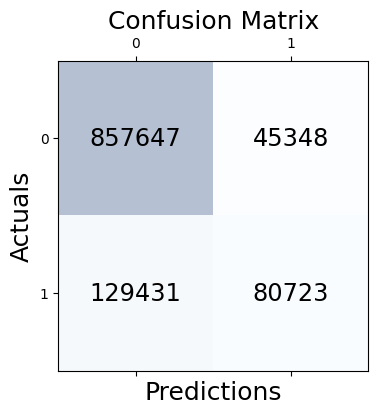

In [44]:
evaluation(y_test, y_pred_tabnet_tuned_imbalance, tabnet_tuned_imbalance)

## Evaluate Random Forests tuned imbalanced model

In [15]:
rf_tuned_imbalance = joblib.load(path_model + "rf_tuned_imbalanced.joblib")
y_pred_rf_tuned_imbalance = rf_tuned_imbalance.predict(X_test)

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[Parallel(n_jobs=8)]: Using ba

AUROC Score:  0.6688960400636432
Balanced Accuracy Score:  0.6688960400636433
F1 Score:  0.48753522121068876
Recall Score:  0.3779085813260752
Precision Score:  0.6867541766109785


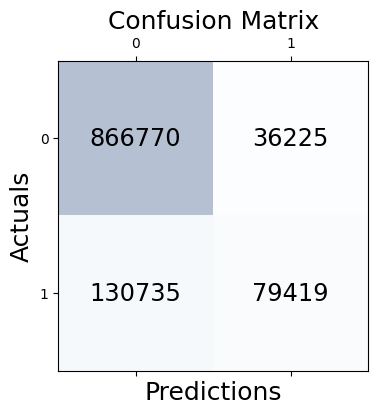

In [16]:
evaluation(y_test, y_pred_rf_tuned_imbalance, rf_tuned_imbalance)

In [45]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Balanced Accuracy,F1,Recall,Precision
2,XGBClassifier,0.688710,0.688710,0.525815,0.416357,0.713352
3,RandomForestClassifier,0.668896,0.668896,0.487535,0.377909,0.686754
4,TabNetClassifier,0.666947,0.666947,0.480173,0.384114,0.640298
1,LogisticRegression,0.663414,0.663414,0.473296,0.377471,0.634327
